In [1]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score

In [2]:
val_data = pd.read_csv('val.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data['Phrase'] = train_data['Phrase'].str.lower()
train_data['Phrase'] = train_data['Phrase'].str.replace(r'[^\w\s]', '', regex=True)
train_data['Phrase'] = train_data['Phrase'].str.replace(r'http\S+', '', regex=True)
train_data = train_data.dropna()


lemmatizer = WordNetLemmatizer()


def lemmatize_phrase(phrase):
    if isinstance(phrase, str):
        return ' '.join([lemmatizer.lemmatize(word) for word in phrase.split()])
    return phrase 

train_data['Phrase'] = train_data['Phrase'].apply(lemmatize_phrase)

In [4]:
val_data['Phrase'] = val_data['Phrase'].str.lower()
val_data['Phrase'] = val_data['Phrase'].str.replace(r'[^\w\s]', '', regex=True)
val_data['Phrase'] = val_data['Phrase'].str.replace(r'http\S+', '', regex=True)
val_data = val_data.dropna()

lemmatizer = WordNetLemmatizer()


def lemmatize_phrase(phrase):
    if isinstance(phrase, str):  
        return ' '.join([lemmatizer.lemmatize(word) for word in phrase.split()])
    return phrase  

val_data['Phrase'] = val_data['Phrase'].apply(lemmatize_phrase)

In [5]:
test_data['Phrase'] = test_data['Phrase'].str.lower()
test_data['Phrase'] = test_data['Phrase'].str.replace(r'[^\w\s]', '', regex=True)
test_data['Phrase'] = test_data['Phrase'].str.replace(r'http\S+', '', regex=True)
test_data = test_data.dropna()

lemmatizer = WordNetLemmatizer()

def lemmatize_phrase(phrase):
    if isinstance(phrase, str):  
        return ' '.join([lemmatizer.lemmatize(word) for word in phrase.split()])
    return phrase  


test_data['Phrase'] = test_data['Phrase'].apply(lemmatize_phrase)

# Augmentation using K - means Clustering

In [6]:
unlbl_data = train_data[train_data['Sentiment'] == -100] # seperating lablled and unlablled data
lbl_data = train_data[train_data['Sentiment'] != -100]

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Extract the text data from 'unlbl_data' for vectorization
text_data = unlbl_data['Phrase']  # Replace 'text_column_name' with the name of the column containing text

# Initialize and apply TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Define number of clusters
num_clusters = 5

# Run K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
unlbl_data['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# Display the resulting clusters
print(unlbl_data[['Phrase', 'Cluster']].head())  # Replace 'text_column_name' with the actual text column name


                                              Phrase  Cluster
0  i mean who need sleep when you can have the sa...        2
1  im not sure whats more disturbing the fact tha...        1
2  a neon green jumpsuit with plaid pant i mean w...        2
3                          it just good luck shut up        0
5  yet in the memory we hold they remain a remind...        1


/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45560/3748782440.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data['Cluster'] = kmeans.fit_predict(tfidf_matrix)


/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45560/93957283.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data['PCA1'] = reduced_data[:, 0]
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45560/93957283.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data['PCA2'] = reduced_data[:, 1]


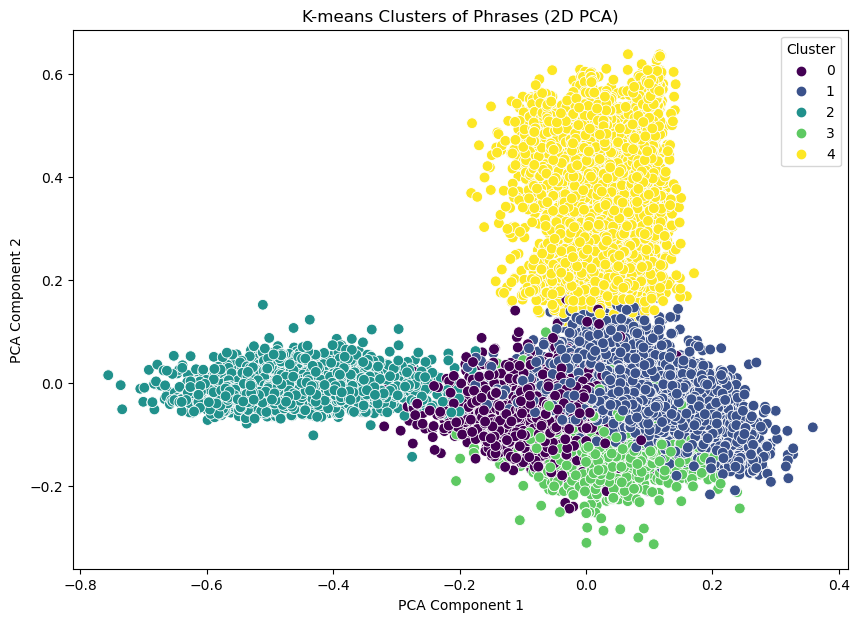

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce the dimensionality of the TF-IDF matrix to 2D using PCA
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Add the PCA components and cluster labels to the DataFrame for plotting
unlbl_data['PCA1'] = reduced_data[:, 0]
unlbl_data['PCA2'] = reduced_data[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=unlbl_data, palette='viridis', s=60)
plt.title('K-means Clusters of Phrases (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [11]:
unlbl_data

Phrase  Sentiment  Cluster  \
0      i mean who need sleep when you can have the sa...       -100        2   
1      im not sure whats more disturbing the fact tha...       -100        1   
2      a neon green jumpsuit with plaid pant i mean w...       -100        2   
3                              it just good luck shut up       -100        0   
5      yet in the memory we hold they remain a remind...       -100        1   
...                                                  ...        ...      ...   
59700     the truth is out prepare to face the reckoning       -100        1   
59701  the sound of the rushing water the sight of th...       -100        1   
59702  dont let anyone else dictate the masterpiece o...       -100        1   
59704  i mean who need a social life or actual human ...       -100        2   
59705  the line between reality and fantasy blur and ...       -100        1   

           PCA1      PCA2  
0     -0.509157 -0.028266  
1      0.082265 -0.049838  
2     -0.450089 -0.007164  
3     -0.035762 -0.037363  
5      0.066397 -0.056107  
...         ...       ...  
59700  0.250747 -0.098419  
59701  0.191947 -0.002450  
59702  0.053712  0.026633  
59704 -0.474521 -0.035796  
59705  0.094227 -0.012291  

[34948 rows x 5 columns]

In [11]:
import numpy as np
mapping = {0: 2, 1: 3, 2: 4, 3: 0, 4: 1}  # example mapping
unique_labels = unlbl_data['Cluster'].unique()
# create new columns for permutations
for i in range(len(unique_labels)):
    new_mapping = {label: unique_labels[(i + np.where(unique_labels == label)[0][0]) % len(unique_labels)] for label in unique_labels}
    unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].map(new_mapping)

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45560/3187285767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].map(new_mapping)
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45560/3187285767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].map(new_mapping)
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45560/3187285767.py:7: SettingWithCopyWarning: 
A v

In [16]:
unlbl_data.head()

Phrase  Sentiment  Cluster  \
0  i mean who need sleep when you can have the sa...       -100        2   
1  im not sure whats more disturbing the fact tha...       -100        1   
2  a neon green jumpsuit with plaid pant i mean w...       -100        2   
3                          it just good luck shut up       -100        0   
5  yet in the memory we hold they remain a remind...       -100        1   

       PCA1      PCA2  Cluster_Perm_0  Cluster_Perm_1  Cluster_Perm_2  \
0 -0.509157 -0.028266               2               1               0   
1  0.082265 -0.049838               1               0               4   
2 -0.450089 -0.007164               2               1               0   
3 -0.035762 -0.037363               0               4               3   
5  0.066397 -0.056107               1               0               4   

   Cluster_Perm_3  Cluster_Perm_4  
0               4               3  
1               3               2  
2               4               3  
3               2               1  
5               3               2

In [18]:
model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=200, solver='saga'))

In [19]:
# Cluster permutations
cluster_perms = [col for col in unlbl_data.columns if col.startswith('Cluster_Perm_')]

for perm in cluster_perms:
    model.fit(unlbl_data['Phrase'], unlbl_data[perm])
    y_pred = model.predict(val_data['Phrase'])

    f1 = f1_score(val_data['Sentiment'], y_pred, average='weighted')
    accuracy = accuracy_score(val_data['Sentiment'], y_pred)

    print(f"Cluster Perm: {perm}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy Score: {accuracy:.4f}\n")

Cluster Perm: Cluster_Perm_0
F1 Score: 0.1214
Accuracy Score: 0.1232

Cluster Perm: Cluster_Perm_1
F1 Score: 0.1000
Accuracy Score: 0.1674

Cluster Perm: Cluster_Perm_2
F1 Score: 0.2524
Accuracy Score: 0.3018

Cluster Perm: Cluster_Perm_3
F1 Score: 0.0653
Accuracy Score: 0.0844

Cluster Perm: Cluster_Perm_4
F1 Score: 0.2773
Accuracy Score: 0.3232



In [24]:
unlbl_data['Sentiment'] = unlbl_data['Cluster_Perm_4']

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45560/705242574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data['Sentiment'] = unlbl_data['Cluster_Perm_4']


In [25]:
filtered_data = unlbl_data[['Phrase','Sentiment']]

In [26]:
filtered_data

Phrase  Sentiment
0      i mean who need sleep when you can have the sa...          3
1      im not sure whats more disturbing the fact tha...          2
2      a neon green jumpsuit with plaid pant i mean w...          3
3                              it just good luck shut up          1
5      yet in the memory we hold they remain a remind...          2
...                                                  ...        ...
59700     the truth is out prepare to face the reckoning          2
59701  the sound of the rushing water the sight of th...          2
59702  dont let anyone else dictate the masterpiece o...          2
59704  i mean who need a social life or actual human ...          3
59705  the line between reality and fantasy blur and ...          2

[34948 rows x 2 columns]

In [27]:
combined_data = pd.concat([lbl_data, filtered_data], ignore_index=False)

In [29]:
combined_data

Phrase  Sentiment
4                          clearly im a functioning adul          1
6            and it not what we thought the truth is out          0
7           guess ill just wing it and hope for the best          3
9      it not like ive been eating pizza and ice crea...          3
15                                 keep being extra yall          1
...                                                  ...        ...
59700     the truth is out prepare to face the reckoning          2
59701  the sound of the rushing water the sight of th...          2
59702  dont let anyone else dictate the masterpiece o...          2
59704  i mean who need a social life or actual human ...          3
59705  the line between reality and fantasy blur and ...          2

[59701 rows x 2 columns]

In [31]:
X = combined_data['Phrase']
y = combined_data['Sentiment']

In [32]:
model.fit(X, y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression',
                 LogisticRegression(max_iter=200, solver='saga'))])

In [33]:
X_val = val_data['Phrase']
y_val = val_data['Sentiment']

In [34]:
y_pred = model.predict(X_val)

In [35]:
f1 = f1_score(y_val, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
accuracy = accuracy_score(y_val, y_pred)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy Score: {accuracy:.4f}')

F1 Score: 0.6152
Accuracy Score: 0.6228


In [38]:
X = lbl_data['Phrase']
y = lbl_data['Sentiment']

In [39]:
model.fit(X, y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression',
                 LogisticRegression(max_iter=200, solver='saga'))])

In [40]:
X_val = val_data['Phrase']
y_val = val_data['Sentiment']

y_pred = model.predict(X_val)

f1 = f1_score(y_val, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
accuracy = accuracy_score(y_val, y_pred)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy Score: {accuracy:.4f}')

F1 Score: 0.9091
Accuracy Score: 0.9092


In [12]:
cluster_sentiment_mapping = {
    0: [1, 0, 0, 0, 0],  
    1: [0, 1, 0, 0, 0],  
    2: [0, 0, 1, 0, 0],  
    3: [0, 0, 0, 1, 0],  
    4: [0, 0, 0, 0, 1],  
}

In [13]:
sentiment_labels = [0, 1, 2, 3, 4]

In [14]:
unlbl_data

Phrase  Sentiment  Cluster  \
0      i mean who need sleep when you can have the sa...       -100        2   
1      im not sure whats more disturbing the fact tha...       -100        1   
2      a neon green jumpsuit with plaid pant i mean w...       -100        2   
3                              it just good luck shut up       -100        0   
5      yet in the memory we hold they remain a remind...       -100        1   
...                                                  ...        ...      ...   
59700     the truth is out prepare to face the reckoning       -100        1   
59701  the sound of the rushing water the sight of th...       -100        1   
59702  dont let anyone else dictate the masterpiece o...       -100        1   
59704  i mean who need a social life or actual human ...       -100        2   
59705  the line between reality and fantasy blur and ...       -100        1   

           PCA1      PCA2  
0     -0.509157 -0.028266  
1      0.082265 -0.049838  
2     -0.450089 -0.007164  
3     -0.035762 -0.037363  
5      0.066397 -0.056107  
...         ...       ...  
59700  0.250747 -0.098419  
59701  0.191947 -0.002450  
59702  0.053712  0.026633  
59704 -0.474521 -0.035796  
59705  0.094227 -0.012291  

[34948 rows x 5 columns]

In [15]:
for label in sentiment_labels:
    unlbl_data[label] = 0  # Initialize all sentiment columns to 0

# Step 2: Map clusters to sentiment columns
for cluster, sentiments in cluster_sentiment_mapping.items():
    for i, label in enumerate(sentiment_labels):
        unlbl_data.loc[unlbl_data['Cluster'] == cluster, label] = sentiments[i]

# Display the updated DataFrame
unlbl_data

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1347472293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[label] = 0  # Initialize all sentiment columns to 0
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1347472293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[label] = 0  # Initialize all sentiment columns to 0
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1347472293.py:2: SettingWithCopyWarning: 
A value is trying to be

Phrase  Sentiment  Cluster  \
0      i mean who need sleep when you can have the sa...       -100        2   
1      im not sure whats more disturbing the fact tha...       -100        1   
2      a neon green jumpsuit with plaid pant i mean w...       -100        2   
3                              it just good luck shut up       -100        0   
5      yet in the memory we hold they remain a remind...       -100        1   
...                                                  ...        ...      ...   
59700     the truth is out prepare to face the reckoning       -100        1   
59701  the sound of the rushing water the sight of th...       -100        1   
59702  dont let anyone else dictate the masterpiece o...       -100        1   
59704  i mean who need a social life or actual human ...       -100        2   
59705  the line between reality and fantasy blur and ...       -100        1   

           PCA1      PCA2  0  1  2  3  4  
0     -0.509157 -0.028266  0  0  1  0  0  
1      0.082265 -0.049838  0  1  0  0  0  
2     -0.450089 -0.007164  0  0  1  0  0  
3     -0.035762 -0.037363  1  0  0  0  0  
5      0.066397 -0.056107  0  1  0  0  0  
...         ...       ... .. .. .. .. ..  
59700  0.250747 -0.098419  0  1  0  0  0  
59701  0.191947 -0.002450  0  1  0  0  0  
59702  0.053712  0.026633  0  1  0  0  0  
59704 -0.474521 -0.035796  0  0  1  0  0  
59705  0.094227 -0.012291  0  1  0  0  0  

[34948 rows x 10 columns]

In [16]:
model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=200, solver='saga'))

In [17]:
for i in range(5):
    model.fit(unlbl_data['Phrase'], unlbl_data[i])
    y_pred = model.predict(val_data['Phrase'])

    f1 = f1_score(val_data['Sentiment'], y_pred, average='weighted')  
    # Calculate Accuracy Score
    accuracy = accuracy_score(val_data['Sentiment'], y_pred) # testing the acccuracy within the lablled test set

    # Print the scores
    print(f'F1 Score: {f1:.4f}')
    print(f'Accuracy Score: {accuracy:.4f}') 

F1 Score: 0.2069
Accuracy Score: 0.3116
F1 Score: 0.0466
Accuracy Score: 0.0816
F1 Score: 0.0797
Accuracy Score: 0.2036
F1 Score: 0.0779
Accuracy Score: 0.1871
F1 Score: 0.0676
Accuracy Score: 0.1963


In [19]:
copys = unlbl_data

In [24]:
unlbl_data['Sentiment'] = unlbl_data.loc[:, 0]

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/4132577466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data['Sentiment'] = unlbl_data.loc[:, 0]


In [25]:
unlbl_data

Phrase  Sentiment  Cluster  \
0      i mean who need sleep when you can have the sa...          0        2   
1      im not sure whats more disturbing the fact tha...          0        1   
2      a neon green jumpsuit with plaid pant i mean w...          0        2   
3                              it just good luck shut up          1        0   
5      yet in the memory we hold they remain a remind...          0        1   
...                                                  ...        ...      ...   
59700     the truth is out prepare to face the reckoning          0        1   
59701  the sound of the rushing water the sight of th...          0        1   
59702  dont let anyone else dictate the masterpiece o...          0        1   
59704  i mean who need a social life or actual human ...          0        2   
59705  the line between reality and fantasy blur and ...          0        1   

           PCA1      PCA2  0  1  2  3  4  
0     -0.509157 -0.028266  0  0  1  0  0  
1      0.082265 -0.049838  0  1  0  0  0  
2     -0.450089 -0.007164  0  0  1  0  0  
3     -0.035762 -0.037363  1  0  0  0  0  
5      0.066397 -0.056107  0  1  0  0  0  
...         ...       ... .. .. .. .. ..  
59700  0.250747 -0.098419  0  1  0  0  0  
59701  0.191947 -0.002450  0  1  0  0  0  
59702  0.053712  0.026633  0  1  0  0  0  
59704 -0.474521 -0.035796  0  0  1  0  0  
59705  0.094227 -0.012291  0  1  0  0  0  

[34948 rows x 10 columns]

In [31]:
copys

Phrase  Sentiment  Cluster  \
0      i mean who need sleep when you can have the sa...          0        2   
1      im not sure whats more disturbing the fact tha...          0        1   
2      a neon green jumpsuit with plaid pant i mean w...          0        2   
3                              it just good luck shut up          1        0   
5      yet in the memory we hold they remain a remind...          0        1   
...                                                  ...        ...      ...   
59700     the truth is out prepare to face the reckoning          0        1   
59701  the sound of the rushing water the sight of th...          0        1   
59702  dont let anyone else dictate the masterpiece o...          0        1   
59704  i mean who need a social life or actual human ...          0        2   
59705  the line between reality and fantasy blur and ...          0        1   

           PCA1      PCA2  0  1  2  3  4  
0     -0.509157 -0.028266  0  0  1  0  0  
1      0.082265 -0.049838  0  1  0  0  0  
2     -0.450089 -0.007164  0  0  1  0  0  
3     -0.035762 -0.037363  1  0  0  0  0  
5      0.066397 -0.056107  0  1  0  0  0  
...         ...       ... .. .. .. .. ..  
59700  0.250747 -0.098419  0  1  0  0  0  
59701  0.191947 -0.002450  0  1  0  0  0  
59702  0.053712  0.026633  0  1  0  0  0  
59704 -0.474521 -0.035796  0  0  1  0  0  
59705  0.094227 -0.012291  0  1  0  0  0  

[34948 rows x 10 columns]

In [32]:
unlbl_data = copys[['Phrase', 'Sentiment']]

In [33]:
unlbl_data

Phrase  Sentiment
0      i mean who need sleep when you can have the sa...          0
1      im not sure whats more disturbing the fact tha...          0
2      a neon green jumpsuit with plaid pant i mean w...          0
3                              it just good luck shut up          1
5      yet in the memory we hold they remain a remind...          0
...                                                  ...        ...
59700     the truth is out prepare to face the reckoning          0
59701  the sound of the rushing water the sight of th...          0
59702  dont let anyone else dictate the masterpiece o...          0
59704  i mean who need a social life or actual human ...          0
59705  the line between reality and fantasy blur and ...          0

[34948 rows x 2 columns]

In [34]:
len(unlbl_data[unlbl_data['Sentiment'] == 2])

0

In [36]:
unlbl_data = copys

In [45]:
import numpy as np
import itertools

unique_labels = unlbl_data['Cluster'].unique()
permutations = np.array(list(itertools.permutations(unique_labels)))

print(permutations)

[[2 1 0 4 3]
 [2 1 0 3 4]
 [2 1 4 0 3]
 [2 1 4 3 0]
 [2 1 3 0 4]
 [2 1 3 4 0]
 [2 0 1 4 3]
 [2 0 1 3 4]
 [2 0 4 1 3]
 [2 0 4 3 1]
 [2 0 3 1 4]
 [2 0 3 4 1]
 [2 4 1 0 3]
 [2 4 1 3 0]
 [2 4 0 1 3]
 [2 4 0 3 1]
 [2 4 3 1 0]
 [2 4 3 0 1]
 [2 3 1 0 4]
 [2 3 1 4 0]
 [2 3 0 1 4]
 [2 3 0 4 1]
 [2 3 4 1 0]
 [2 3 4 0 1]
 [1 2 0 4 3]
 [1 2 0 3 4]
 [1 2 4 0 3]
 [1 2 4 3 0]
 [1 2 3 0 4]
 [1 2 3 4 0]
 [1 0 2 4 3]
 [1 0 2 3 4]
 [1 0 4 2 3]
 [1 0 4 3 2]
 [1 0 3 2 4]
 [1 0 3 4 2]
 [1 4 2 0 3]
 [1 4 2 3 0]
 [1 4 0 2 3]
 [1 4 0 3 2]
 [1 4 3 2 0]
 [1 4 3 0 2]
 [1 3 2 0 4]
 [1 3 2 4 0]
 [1 3 0 2 4]
 [1 3 0 4 2]
 [1 3 4 2 0]
 [1 3 4 0 2]
 [0 2 1 4 3]
 [0 2 1 3 4]
 [0 2 4 1 3]
 [0 2 4 3 1]
 [0 2 3 1 4]
 [0 2 3 4 1]
 [0 1 2 4 3]
 [0 1 2 3 4]
 [0 1 4 2 3]
 [0 1 4 3 2]
 [0 1 3 2 4]
 [0 1 3 4 2]
 [0 4 2 1 3]
 [0 4 2 3 1]
 [0 4 1 2 3]
 [0 4 1 3 2]
 [0 4 3 2 1]
 [0 4 3 1 2]
 [0 3 2 1 4]
 [0 3 2 4 1]
 [0 3 1 2 4]
 [0 3 1 4 2]
 [0 3 4 2 1]
 [0 3 4 1 2]
 [4 2 1 0 3]
 [4 2 1 3 0]
 [4 2 0 1 3]
 [4 2 0 3 1]
 [4 2 3 1 0]

In [42]:
for i, perm in enumerate(permutations):
    unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var/folders/g4

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1186020405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].apply(lambda x: np.where(unique_labels == x, perm, unique_labels)[0])
/var/folders/g4

In [43]:
unlbl_data

Phrase  Sentiment  Cluster  \
0      i mean who need sleep when you can have the sa...          0        2   
1      im not sure whats more disturbing the fact tha...          0        1   
2      a neon green jumpsuit with plaid pant i mean w...          0        2   
3                              it just good luck shut up          1        0   
5      yet in the memory we hold they remain a remind...          0        1   
...                                                  ...        ...      ...   
59700     the truth is out prepare to face the reckoning          0        1   
59701  the sound of the rushing water the sight of th...          0        1   
59702  dont let anyone else dictate the masterpiece o...          0        1   
59704  i mean who need a social life or actual human ...          0        2   
59705  the line between reality and fantasy blur and ...          0        1   

           PCA1      PCA2  0  1  2  3  4  ...  Cluster_Perm_110  \
0     -0.509157 -0.028266  0  0  1  0  0  ...                 3   
1      0.082265 -0.049838  0  1  0  0  0  ...                 2   
2     -0.450089 -0.007164  0  0  1  0  0  ...                 3   
3     -0.035762 -0.037363  1  0  0  0  0  ...                 2   
5      0.066397 -0.056107  0  1  0  0  0  ...                 2   
...         ...       ... .. .. .. .. ..  ...               ...   
59700  0.250747 -0.098419  0  1  0  0  0  ...                 2   
59701  0.191947 -0.002450  0  1  0  0  0  ...                 2   
59702  0.053712  0.026633  0  1  0  0  0  ...                 2   
59704 -0.474521 -0.035796  0  0  1  0  0  ...                 3   
59705  0.094227 -0.012291  0  1  0  0  0  ...                 2   

       Cluster_Perm_111  Cluster_Perm_112  Cluster_Perm_113  Cluster_Perm_114  \
0                     3                 3                 3                 3   
1                     2                 2                 2                 2   
2                     3                 3                 3                 3   
3                     2                 2                 2                 2   
5                     2                 2                 2                 2   
...                 ...               ...               ...               ...   
59700                 2                 2                 2                 2   
59701                 2                 2                 2                 2   
59702                 2                 2                 2                 2   
59704                 3                 3                 3                 3   
59705                 2                 2                 2                 2   

       Cluster_Perm_115  Cluster_Perm_116  Cluster_Perm_117  Cluster_Perm_118  \
0                     3                 3                 3                 3   
1                     2                 2                 2                 2   
2                     3                 3                 3                 3   
3                     2                 2                 2                 2   
5                     2                 2                 2                 2   
...                 ...               ...               ...               ...   
59700                 2                 2                 2                 2   
59701                 2                 2                 2                 2   
59702                 2                 2                 2                 2   
59704                 3                 3                 3                 3   
59705                 2                 2                 2                 2   

       Cluster_Perm_119  
0                     3  
1                     2  
2                     3  
3                     2  
5                     2  
...                 ...  
59700                 2  
59701                 2  
59702                 2  
59704                 3  
59705                 2  

[34948 rows x 130 columns

In [47]:
unlbl_data = copys

In [48]:
mapping = {0: 2, 1: 3, 2: 4, 3: 0, 4: 1}  # example mapping

# create new columns for permutations
for i in range(len(unique_labels)):
    new_mapping = {label: unique_labels[(i + np.where(unique_labels == label)[0][0]) % len(unique_labels)] for label in unique_labels}
    unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].map(new_mapping)

/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1875704511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].map(new_mapping)
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1875704511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlbl_data[f'Cluster_Perm_{i}'] = unlbl_data['Cluster'].map(new_mapping)
/var/folders/g4/xw1m66k94_5glvd0271lzszr0000gn/T/ipykernel_45472/1875704511.py:6: SettingWithCopyWarning: 
A v

In [49]:
unlbl_data

Phrase  Sentiment  Cluster  \
0      i mean who need sleep when you can have the sa...          0        2   
1      im not sure whats more disturbing the fact tha...          0        1   
2      a neon green jumpsuit with plaid pant i mean w...          0        2   
3                              it just good luck shut up          1        0   
5      yet in the memory we hold they remain a remind...          0        1   
...                                                  ...        ...      ...   
59700     the truth is out prepare to face the reckoning          0        1   
59701  the sound of the rushing water the sight of th...          0        1   
59702  dont let anyone else dictate the masterpiece o...          0        1   
59704  i mean who need a social life or actual human ...          0        2   
59705  the line between reality and fantasy blur and ...          0        1   

           PCA1      PCA2  0  1  2  3  4  ...  Cluster_Perm_110  \
0     -0.509157 -0.028266  0  0  1  0  0  ...                 3   
1      0.082265 -0.049838  0  1  0  0  0  ...                 2   
2     -0.450089 -0.007164  0  0  1  0  0  ...                 3   
3     -0.035762 -0.037363  1  0  0  0  0  ...                 2   
5      0.066397 -0.056107  0  1  0  0  0  ...                 2   
...         ...       ... .. .. .. .. ..  ...               ...   
59700  0.250747 -0.098419  0  1  0  0  0  ...                 2   
59701  0.191947 -0.002450  0  1  0  0  0  ...                 2   
59702  0.053712  0.026633  0  1  0  0  0  ...                 2   
59704 -0.474521 -0.035796  0  0  1  0  0  ...                 3   
59705  0.094227 -0.012291  0  1  0  0  0  ...                 2   

       Cluster_Perm_111  Cluster_Perm_112  Cluster_Perm_113  Cluster_Perm_114  \
0                     3                 3                 3                 3   
1                     2                 2                 2                 2   
2                     3                 3                 3                 3   
3                     2                 2                 2                 2   
5                     2                 2                 2                 2   
...                 ...               ...               ...               ...   
59700                 2                 2                 2                 2   
59701                 2                 2                 2                 2   
59702                 2                 2                 2                 2   
59704                 3                 3                 3                 3   
59705                 2                 2                 2                 2   

       Cluster_Perm_115  Cluster_Perm_116  Cluster_Perm_117  Cluster_Perm_118  \
0                     3                 3                 3                 3   
1                     2                 2                 2                 2   
2                     3                 3                 3                 3   
3                     2                 2                 2                 2   
5                     2                 2                 2                 2   
...                 ...               ...               ...               ...   
59700                 2                 2                 2                 2   
59701                 2                 2                 2                 2   
59702                 2                 2                 2                 2   
59704                 3                 3                 3                 3   
59705                 2                 2                 2                 2   

       Cluster_Perm_119  
0                     3  
1                     2  
2                     3  
3                     2  
5                     2  
...                 ...  
59700                 2  
59701                 2  
59702                 2  
59704                 3  
59705                 2  

[34948 rows x 130 columns

In [51]:
copys.columns

Index([          'Phrase',        'Sentiment',          'Cluster',
                   'PCA1',             'PCA2',                  0,
                        1,                  2,                  3,
                        4,
       ...
       'Cluster_Perm_110', 'Cluster_Perm_111', 'Cluster_Perm_112',
       'Cluster_Perm_113', 'Cluster_Perm_114', 'Cluster_Perm_115',
       'Cluster_Perm_116', 'Cluster_Perm_117', 'Cluster_Perm_118',
       'Cluster_Perm_119'],
      dtype='object', length=130)